In [84]:
import numpy as np
import math

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [85]:
full_data = pd.read_csv("tracks.csv")
train, test = train_test_split(full_data, test_size=0.2)

In [86]:
train.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
577486,1iUHHOdDsSFIYSRtvhDldl,Sweet Little Rock & Roller,14,171840,0,['Jerry Williams'],['1PJOXqvEZQjdDAV1R5rS07'],1974-01-01,0.715,0.5570,5,-10.074,1,0.0320,0.0868,0.000340,0.221,0.9670,138.272,4
22029,1Lu4LUCLm9qH7kozw1E9OB,Afro-Cuban Drum Suite - Live,4,348853,0,['Dizzy Gillespie'],['5RzjqfPS0Bu4bUMkyNNDpn'],1948,0.503,0.5580,5,-13.213,1,0.2040,0.9650,0.741000,0.934,0.3950,153.991,4
581508,0A10bGhI6YlyQkRPDKbT4F,Min trollmoj funkar,21,197173,0,"['Peps Persson', 'Downhome Bluesband']","['5xmgC1jISe31QZSp8gqKUJ', '0oOAwUE7iK3Jyp8aAm...",1997-01-01,0.564,0.9570,9,-4.809,1,0.1370,0.3040,0.000071,0.360,0.7380,142.442,4
486788,481jmdJZxHrqGk36cF9RYX,Heute habe ich an dich gedacht,43,209507,0,"['Bernhard Brink', 'Audrey Landers']","['0rFjQZAuPOhjYhRaGHNbKR', '3zwOQEz7tRniwOKwyv...",2003-01-01,0.605,0.6870,1,-6.987,1,0.0254,0.4170,0.000000,0.351,0.7250,104.007,4
242724,0r8Qsg94iY23UowQRqm8LY,Subtle Body,38,544080,0,['Fila Brazillia'],['2wss0kNi7zdZTrxnCFxSQW'],1995,0.199,0.0151,1,-32.063,1,0.0410,0.8020,0.765000,0.111,0.0341,135.093,3


In [87]:
train.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [88]:
def fix_year(data):
    data['release_date'] = pd.to_datetime(data['release_date']) # convert 'dates' column to datetime dtype
    data['year'] = data['release_date'].dt.year # extract year value into new 'year' column
    return data

In [93]:

def process_data_fm(data):

    data = fix_year(data)

    data = (
        data.pipe(select_columns,'popularity','duration_ms','explicit','danceability','energy','year')
    )
    data.columns.values
    x = data.drop(['popularity'], axis=1)
    y = data['popularity']
    return x,y

In [94]:
def select_columns(data, *columns):
    return data.reindex(columns = columns)

In [97]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array-like): vector of actual values
      predicted (1D array-like): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    MSE = np.square(np.subtract(actual,predicted)).mean()
    rmse = math.sqrt(MSE)
    return rmse

In [98]:
X_train, y_train = process_data_fm(train)
X_test, y_test = process_data_fm(test)

In [99]:
alphas = np.arange(0.1, 200.1, .1)
final_model = lm.LassoCV(alphas=alphas, cv=5)

# Fit and predict
final_model.fit(X_train, y_train)
y_predicted = final_model.predict(X_test)

print(f'The validation RMSE for this model with '
      f'alpha={round(float(final_model.alpha_), 2)} is '
      f'{round(rmse(y_test, y_predicted), 2)}.')

The validation RMSE for this model with alpha=0.1 is 14.7.


Text(0, 0.5, 'RMSE')

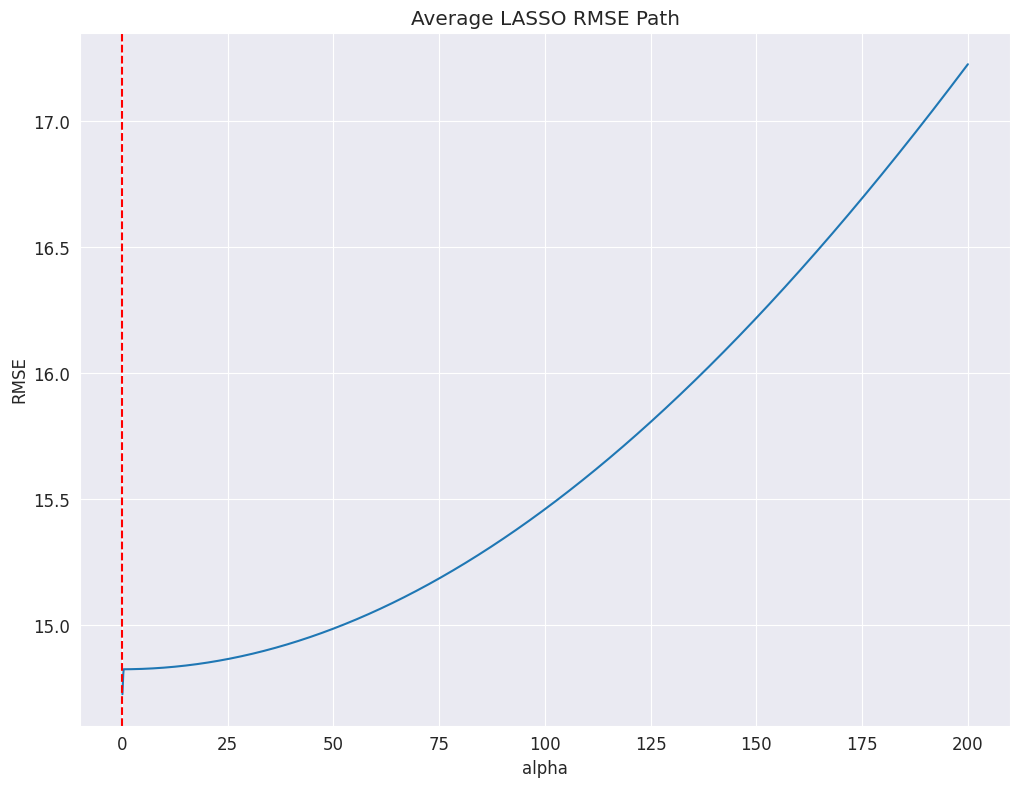

In [100]:
optimal_alpha = round(float(final_model.alpha_), 2)
plt.plot(final_model.alphas_, np.sqrt(np.apply_along_axis(np.mean, 1, final_model.mse_path_)))
plt.axvline(x=optimal_alpha, color='red', linestyle='dashed')
ax = plt.gca()
ax.set_title('Average LASSO RMSE Path')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')